In [1]:
import pandas as pd

file_path = "data/data_final.xlsx"
df = pd.read_excel(file_path)
df

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근,기본
0,1,네오,2023-09-01,평일,07:42,16:45,00:00:00
1,1,네오,2023-09-04,평일,08:00,17:00,00:00:00
2,1,네오,2023-09-05,평일,07:43,16:47,07:47:00
3,1,네오,2023-09-06,평일,07:45,16:47,07:47:00
4,1,네오,2023-09-07,평일,07:41,16:45,07:45:00
...,...,...,...,...,...,...,...
1199,17,올리버,2024-01-25,평일,07:57,17:11,08:11:00
1200,17,올리버,2024-01-26,평일,08:00,16:54,07:54:00
1201,17,올리버,2024-01-29,평일,07:57,16:54,07:54:00
1202,17,올리버,2024-01-30,평일,07:57,17:21,08:21:00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용자ID   1204 non-null   int64         
 1   이름      1204 non-null   object        
 2   근무일자    1204 non-null   datetime64[ns]
 3   근무일명칭   1204 non-null   object        
 4   출근      1139 non-null   object        
 5   퇴근      1139 non-null   object        
 6   기본      1204 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 66.0+ KB


In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 0 to 1203
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용자ID   1139 non-null   int64         
 1   이름      1139 non-null   object        
 2   근무일자    1139 non-null   datetime64[ns]
 3   근무일명칭   1139 non-null   object        
 4   출근      1139 non-null   object        
 5   퇴근      1139 non-null   object        
 6   기본      1139 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 71.2+ KB


In [5]:
df.drop(labels="기본", axis=1, inplace=True)
df.head()

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근
0,1,네오,2023-09-01,평일,07:42,16:45
1,1,네오,2023-09-04,평일,08:00,17:00
2,1,네오,2023-09-05,평일,07:43,16:47
3,1,네오,2023-09-06,평일,07:45,16:47
4,1,네오,2023-09-07,평일,07:41,16:45


In [6]:
df["근무일자"][0], type(df["근무일자"][0])

(Timestamp('2023-09-01 00:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [7]:
df[df["근무일자"] >= pd.Timestamp("2023-10-01")]

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근
19,1,네오,2023-10-04,평일,07:43,16:46
20,1,네오,2023-10-05,평일,07:40,16:46
21,1,네오,2023-10-06,평일,07:39,16:47
22,1,네오,2023-10-10,평일,07:40,16:51
23,1,네오,2023-10-11,평일,07:39,16:53
...,...,...,...,...,...,...
1199,17,올리버,2024-01-25,평일,07:57,17:11
1200,17,올리버,2024-01-26,평일,08:00,16:54
1201,17,올리버,2024-01-29,평일,07:57,16:54
1202,17,올리버,2024-01-30,평일,07:57,17:21


In [8]:
data = df[df["근무일자"] >= pd.Timestamp("2023-10-01")]
data.describe()

,사용자ID,근무일자
count,940.000000,940
mean,9.052128,2023-12-02 08:30:07.659574528
min,1.000000,2023-10-04 00:00:00
25%,6.000000,2023-11-02 00:00:00
50%,10.000000,2023-11-30 00:00:00
75%,13.000000,2024-01-03 00:00:00
max,17.000000,2024-01-31 00:00:00
std,4.458356,NaN


In [9]:
data["출근"].iloc[0], type(data["출근"].iloc[0])

('07:43', str)

### 시각화

In [10]:
pd.set_option('mode.chained_assignment', None) # 작업이 명확하지 않을 때 경고문 (A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# data = pd.read_excel("data/data_final.xlsx")

# Convert time to minutes
def time_to_min(t):
    return t.hour * 60 + t.minute


# Convert str to datetime objects
data["출근"] = pd.to_datetime(data["출근"], format="%H:%M").dt.time
data["퇴근"] = pd.to_datetime(data["퇴근"], format="%H:%M").dt.time

data["출근_min"] = data["출근"].apply(time_to_min)
data["퇴근_min"] = data["퇴근"].apply(time_to_min)

In [18]:
# 오전 반차 제외
# Set after 08:00 but before 12:00 (시간x분)
data["지각"] = data.apply(lambda row: (8 * 60) < row["출근_min"] <= (12 * 60), axis=1) 

In [19]:
data.head() # (7*60)+43 = 420+43

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근,출근_min,퇴근_min,지각
19,1,네오,2023-10-04,평일,07:43:00,16:46:00,463,1006,False
20,1,네오,2023-10-05,평일,07:40:00,16:46:00,460,1006,False
21,1,네오,2023-10-06,평일,07:39:00,16:47:00,459,1007,False
22,1,네오,2023-10-10,평일,07:40:00,16:51:00,460,1011,False
23,1,네오,2023-10-11,평일,07:39:00,16:53:00,459,1013,False


In [20]:
# 사용자 지각 획수 확인
tardiness_ids = (
    data.groupby(["사용자ID", "이름"])["지각"].sum().reset_index()
)

tardiness_ids

,사용자ID,이름,지각
0,1,네오,0
1,4,제이지,1
2,5,캐치,4
3,6,튜브,18
4,7,콘,0
5,8,어피치,26
6,10,춘식이,1
7,11,프로도,22
8,12,말리,41
9,13,라이언,0


In [21]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

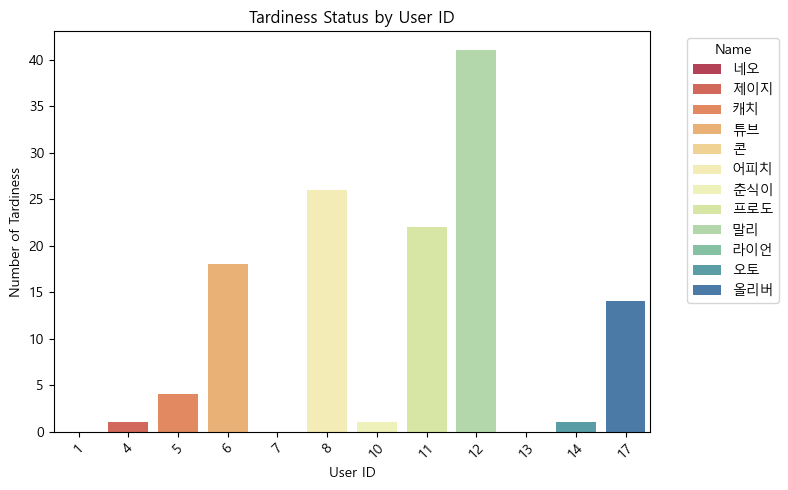

In [22]:
plt.figure(figsize=(8, 5))

sns.barplot(
    x="사용자ID",
    y="지각",
    hue="이름",
    data=tardiness_ids,
    dodge=False, # True : hue로 구분된 그룹 사이 간격을 만들어 데이터가 겹치는 것을 방지
    palette="Spectral",
)

plt.title("Tardiness Status by User ID")
plt.xlabel("User ID")
plt.ylabel("Number of Tardiness")
plt.legend(title="Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
data[data["지각"] & (data["사용자ID"] == 5)]

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근,출근_min,퇴근_min,지각
227,5,캐치,2023-10-11,평일,08:04:00,17:06:00,484,1026,True
248,5,캐치,2023-11-09,평일,08:05:00,18:23:00,485,1103,True
278,5,캐치,2023-12-21,평일,08:10:00,19:12:00,490,1152,True
292,5,캐치,2024-01-12,평일,08:02:00,11:29:00,482,689,True


In [24]:
# data[data['지각'] & (data['사용자ID'] == 12)]
len(data[data["지각"] & (data["사용자ID"] == 12)])

41

In [25]:
len(data[data["지각"] & (data["사용자ID"] == 10)])

1

### 경향 분석

In [26]:
from datetime import datetime

# 근무 시간
def calc_working_hours(check_in, check_out):
    # Convert time objects to datetime for the calculation
    check_in_dt = datetime.combine(datetime.today(), check_in)
    check_out_dt = datetime.combine(datetime.today(), check_out)
    working_hours = check_out_dt - check_in_dt
    
    return working_hours.total_seconds() / 3600  # Convert seconds to hours

In [27]:
data.head()

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근,출근_min,퇴근_min,지각
19,1,네오,2023-10-04,평일,07:43:00,16:46:00,463,1006,False
20,1,네오,2023-10-05,평일,07:40:00,16:46:00,460,1006,False
21,1,네오,2023-10-06,평일,07:39:00,16:47:00,459,1007,False
22,1,네오,2023-10-10,평일,07:40:00,16:51:00,460,1011,False
23,1,네오,2023-10-11,평일,07:39:00,16:53:00,459,1013,False


In [28]:
data["근무시간"] = data.apply(
    lambda x: calc_working_hours(x["출근"], x["퇴근"]), axis=1
)

In [29]:
data["조기출근"] = data["출근_min"] < (8 * 60)

In [30]:
data.head()

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근,출근_min,퇴근_min,지각,근무시간,조기출근
19,1,네오,2023-10-04,평일,07:43:00,16:46:00,463,1006,False,9.050000,True
20,1,네오,2023-10-05,평일,07:40:00,16:46:00,460,1006,False,9.100000,True
21,1,네오,2023-10-06,평일,07:39:00,16:47:00,459,1007,False,9.133333,True
22,1,네오,2023-10-10,평일,07:40:00,16:51:00,460,1011,False,9.183333,True
23,1,네오,2023-10-11,평일,07:39:00,16:53:00,459,1013,False,9.233333,True


In [31]:
workdays = (
    data.groupby(["사용자ID", "이름"])["근무일자"].count().reset_index(name="근무일수")
)

tardy = (
    data.groupby(["사용자ID", "이름"])["지각"].sum().reset_index(name="지각")
)

early_arrivals = (
    data.groupby(["사용자ID", "이름"])["조기출근"].sum().reset_index(name="조기출근")
)

avg_working_hours = (
    data.groupby(["사용자ID", "이름"])["근무시간"].mean().reset_index(name="평균근무시간")
)

In [32]:
# Merge all metrics
analysis = pd.merge(workdays, tardy, on=["사용자ID", "이름"])
analysis = pd.merge(analysis, early_arrivals, on=["사용자ID", "이름"])
analysis = pd.merge(analysis, avg_working_hours, on=["사용자ID", "이름"])

In [33]:
analysis

,사용자ID,이름,근무일수,지각,조기출근,평균근무시간
0,1,네오,77,0,74,8.748918
1,4,제이지,76,1,71,8.757237
2,5,캐치,78,4,71,8.839957
3,6,튜브,80,18,53,8.752917
4,7,콘,77,0,73,9.581385
5,8,어피치,77,26,40,8.735281
6,10,춘식이,79,1,72,8.708439
7,11,프로도,78,22,50,8.647436
8,12,말리,79,41,29,9.240928
9,13,라이언,79,0,74,8.865190


In [35]:
analysis["지각경향(%)"] = (analysis["지각"] / analysis["근무일수"]) * 100
analysis["조기출근경향(%)"] = (analysis["조기출근"] / analysis["근무일수"]) * 100

analysis_sorted = analysis.sort_values("지각경향(%)", ascending=True)

analysis_sorted["평균근무시간"] = analysis_sorted["평균근무시간"].round(2)
analysis_sorted["지각경향(%)"] = analysis_sorted["지각경향(%)"].round(2)
analysis_sorted["조기출근경향(%)"] = analysis_sorted["조기출근경향(%)"].round(2)

analysis_sorted

,사용자ID,이름,근무일수,지각,조기출근,평균근무시간,지각경향(%),조기출근경향(%)
0,1,네오,77,0,74,8.75,0.00,96.10
4,7,콘,77,0,73,9.58,0.00,94.81
9,13,라이언,79,0,74,8.87,0.00,93.67
10,14,오토,80,1,75,8.69,1.25,93.75
6,10,춘식이,79,1,72,8.71,1.27,91.14
1,4,제이지,76,1,71,8.76,1.32,93.42
2,5,캐치,78,4,71,8.84,5.13,91.03
11,17,올리버,80,14,53,8.83,17.50,66.25
3,6,튜브,80,18,53,8.75,22.50,66.25
7,11,프로도,78,22,50,8.65,28.21,64.10


### 평균 지각 시간 분석

In [36]:
start_time = datetime.strptime("08:00", "%H:%M").time()
end_time = datetime.strptime("12:00", "%H:%M").time()

filtered_data = data[(data["출근"] > start_time) & (data["출근"] < end_time)]

In [37]:
filtered_data.head()

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근,출근_min,퇴근_min,지각,근무시간,조기출근
162,4,제이지,2023-12-01,평일,08:38:00,17:38:00,518,1058,True,9.000000,False
227,5,캐치,2023-10-11,평일,08:04:00,17:06:00,484,1026,True,9.033333,False
248,5,캐치,2023-11-09,평일,08:05:00,18:23:00,485,1103,True,10.300000,False
278,5,캐치,2023-12-21,평일,08:10:00,19:12:00,490,1152,True,11.033333,False
292,5,캐치,2024-01-12,평일,08:02:00,11:29:00,482,689,True,3.450000,False


In [38]:
# 사용 X
dates_to_remove = {
    6: ["2023-12-01"],
    8: ["2023-12-01"],
    11: ["2023-12-01", "2023-11-30", "2024-01-29"],
    12: ["2023-12-01", "2024-01-22", "2024-01-29"],
    17: ["2023-12-01"],
}

for user_id, dates in dates_to_remove.items():
    for date in dates:
        filtered_data = filtered_data[
            ~(
                (filtered_data["사용자ID"] == user_id)
                & (filtered_data["근무일자"] == pd.to_datetime(date))
            )
        ]

In [39]:
filtered_data[(filtered_data["사용자ID"] == 6) & (filtered_data["근무일자"] == pd.to_datetime("2023-12-01"))]

,사용자ID,이름,근무일자,근무일명칭,출근,퇴근,출근_min,퇴근_min,지각,근무시간,조기출근


In [40]:
# 지각 시간 계산
filtered_data["평균지각시간"] = filtered_data["출근"].apply(
    lambda x: (
        datetime.combine(datetime.today(), x)
        - datetime.combine(datetime.today(), start_time)
    ).total_seconds()
    / 60
)

In [41]:
filtered_data_ave = (filtered_data.groupby(["사용자ID", "이름"])["평균지각시간"].mean().reset_index())

In [42]:
# 10회 이상 지각자에 대해
tardy_count = filtered_data.groupby("사용자ID").size().reset_index(name="지각")
over_10 = tardy_count[tardy_count["지각"] > 10]["사용자ID"]
over_10

2     6
3     8
5    11
6    12
8    17
Name: 사용자ID, dtype: int64

In [43]:
filtered_data_ave = filtered_data_ave[
    filtered_data_ave["사용자ID"].isin(over_10)
].round(2)

In [44]:
filtered_data_ave

,사용자ID,이름,평균지각시간
2,6,튜브,17.12
3,8,어피치,4.80
5,11,프로도,5.95
6,12,말리,13.16
8,17,올리버,9.93


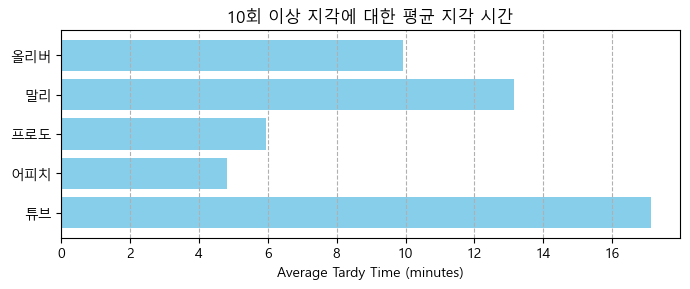

In [45]:
plt.figure(figsize=(7, 3))
bars = plt.barh(
    filtered_data_ave["이름"],
    filtered_data_ave["평균지각시간"],
    color="skyblue",
)

plt.title("10회 이상 지각에 대한 평균 지각 시간")
plt.xlabel("Average Tardy Time (minutes)")
plt.yticks(filtered_data_ave["이름"])
plt.grid(axis="x", linestyle="--")

plt.tight_layout()
plt.show()